<font size="5"><b>Indicators of Loan Default Risk through EDA</b></font>

This project aims to integrate and analyze datasets
related to potential indicators of loan default risk.
Merging these datasets provides a comprehensive view
of the relevant factors, enabling a thorough exploratory data analysis.

The following analytical techniques were used in the exploration of the datasets:

a. Data Integration
b. Data Quality Assessment
c. Univariate Analysis
d. Bivariate/Multivariate Analysis
e. Feature Engineering
f. Visualization Techniques
g. Statistical Testing
h. Predictive Patterns Identification
i. Documentation and Presentation
j. Code Optimization

**a. Data Integration** 

Given the presence of two tables, join operations using pandas were applied to merge datasets for a holistic analysis.

Before merging, a prefix is added to columns of each table to identify from which table they originated.

In [21]:
# Import the necessary libraries for data manipulation and visualization
import pandas as pd # a data manipulation library Used for dataset merging.
import matplotlib.pyplot as plt # Python plotting library for data visualization 
import seaborn as sns # Advanced visualization library enhancing Matplotlib
from scipy.stats import zscore  # Import zscore function from scipy.stats library
plt.rcParams['font.family'] = 'Arial' # Set the default font for all matplotlib plots to Arial

In [23]:
# Load the first table from 'table1.csv'. The table1.csv is application_data.csv  
table1 = pd.read_csv('data/table1.csv')
# Load the second table from 'table2.csv'. The table2.csv is previous_application.csv
table2 = pd.read_csv('data/table2.csv')
# Merging the two tables on a common column (assuming 'SK_ID_CURR' is the common column). 
merged_table = pd.merge(table1, table2, on='SK_ID_CURR', how='inner') # 'inner' join is used here
# Save the merged table to 'merged_table.csv'
merged_table.to_csv('merged_table.csv', index = False)

In [24]:
# Add a prefix 'table1_' to each column name of the first table for clear distinction post-merge
table1 = table1.add_prefix('table1_')
# Add a prefix 'table2_' to each column name of the second table for clear distinction post-merge
table2 = table2.add_prefix('table2_')

**b. Data Quality Assessment**

Before diving into any analysis, the integrity of the data was assessed. This ensured that missing values, outliers, or any other potential anomalies were treated, ensuring accurate insights

In [25]:
# Load the data from the 'merged_table.csv' file into the df DataFrame
df = pd.read_csv('data/merged_table.csv')
# --- General Inspection of Data ---
# Print out the general structure of the df DataFrame
print("Basic Information:")
print("------------------")
# Display data types, non-null values, and memory information of the DataFrame's columns
print(df.info())
print("\n")

Basic Information:
------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1413701 entries, 0 to 1413700
Columns: 158 entries, SK_ID_CURR to NFLAG_INSURED_ON_APPROVAL
dtypes: float64(80), int64(46), object(32)
memory usage: 1.7+ GB
None




**- Adding new field to the dataset**

New fields were added to the dataset to provide a more precise and intuitive representation of the applicant features. For example, age in years rather than negative days makes the data more understandable for analysis and reporting.

In [26]:
# Convert the negative 'DAYS_BIRTH' values to years for better readability and understanding of the client's age.
df['AGE_YEARS'] = (-df['DAYS_BIRTH']) / 365.25

**- Convert negative values to positive values** 

Since the negative sign was ambiguous for days, the sign of relevant fields were changed to the positive

In [27]:
# List of fields to convert to positive values
fields_to_convert = [
    'DAYS_EMPLOYED',
    'DAYS_REGISTRATION',
    'DAYS_ID_PUBLISH',
    'DAYS_LAST_PHONE_CHANGE',
    'DAYS_DECISION',
    'DAYS_FIRST_DUE',
    'DAYS_LAST_DUE_1ST_VERSION',
    'DAYS_LAST_DUE',
    'DAYS_TERMINATION'
]

# Convert values in each field to positive
for field in fields_to_convert:
    df[field] = df[field].abs()

**- Identifying the rows that duplicated**

Identifying duplicate rows safeguards dataset integrity, preventing potential data collection errors. Duplicates can distort analytical results, risk machine learning model overfitting, and are vital to address during data cleaning.

In [28]:
# Count the total number of rows in the DataFrame that are duplicates
duplicate_rows = df.duplicated().sum()
# Display the number of duplicate rows found
print(f"Number of duplicated rows: {duplicate_rows}")
print("\n")

Number of duplicated rows: 0




**- Identifying the constant values**


Identifying columns with constant values helps in removing redundant features, streamlining datasets, and enhancing model performance by handling non-informative data.

In [29]:
# Check for columns with constant values (no variability)
constant_columns = [col for col in df.columns if df[col].nunique() == 1]
print(f"Constant columns: {constant_columns}")
print("\n")

Constant columns: ['FLAG_MOBIL']




The constant columns were hided to ensure the data quality improvement

In [30]:
# hiding the constant column of FLAG_MOBIL
hidden_df = df.drop('FLAG_MOBIL', axis = 1)

**- Identifying the unique values**

The data diversity is assessed by displaying unique values per column, helping understand feature variability and aiding in informed feature selection for analysis.

In [31]:
# --- Unique and Missing Values ---
# Iterate through each column of the DataFrame
for column in df.columns:
    # Calculate number of unique values for the column
    unique_vals = df[column].nunique()
    # Print column's name and its unique values count
    print(f"{column}: {unique_vals} unique values")
    print("\n")

SK_ID_CURR: 291057 unique values


TARGET: 2 unique values


NAME_CONTRACT_TYPE_x: 2 unique values


CODE_GENDER: 3 unique values


FLAG_OWN_CAR: 2 unique values


FLAG_OWN_REALTY: 2 unique values


CNT_CHILDREN: 15 unique values


AMT_INCOME_TOTAL: 1876 unique values


AMT_CREDIT_x: 5496 unique values


AMT_ANNUITY_x: 13371 unique values


AMT_GOODS_PRICE_x: 986 unique values


NAME_TYPE_SUITE_x: 7 unique values


NAME_INCOME_TYPE: 7 unique values


NAME_EDUCATION_TYPE: 5 unique values


NAME_FAMILY_STATUS: 5 unique values


NAME_HOUSING_TYPE: 6 unique values


REGION_POPULATION_RELATIVE: 81 unique values


DAYS_BIRTH: 17448 unique values


DAYS_EMPLOYED: 12451 unique values


DAYS_REGISTRATION: 15607 unique values


DAYS_ID_PUBLISH: 6161 unique values


OWN_CAR_AGE: 61 unique values


FLAG_MOBIL: 1 unique values


FLAG_EMP_PHONE: 2 unique values


FLAG_WORK_PHONE: 2 unique values


FLAG_CONT_MOBILE: 2 unique values


FLAG_PHONE: 2 unique values


FLAG_EMAIL: 2 unique values


OCCUPAT

Following is a table of unique values in a MS Excel xlsx format

In [32]:
# Iterate through each column of the DataFrame
results = []
for column in df.columns:
    # Calculate number of unique values for the column
    unique_vals = df[column].nunique()
    # Append the results to a list
    results.append([column, unique_vals])
# Create a new DataFrame from the results list
result_df = pd.DataFrame(results, columns = ["Column Name", "Unique Values Count"])
# Save the results to an Excel file
result_df.to_excel("unique_values_results.xlsx", index = False)

The unique values of each field is drawn in a horizontal bar chart as follows

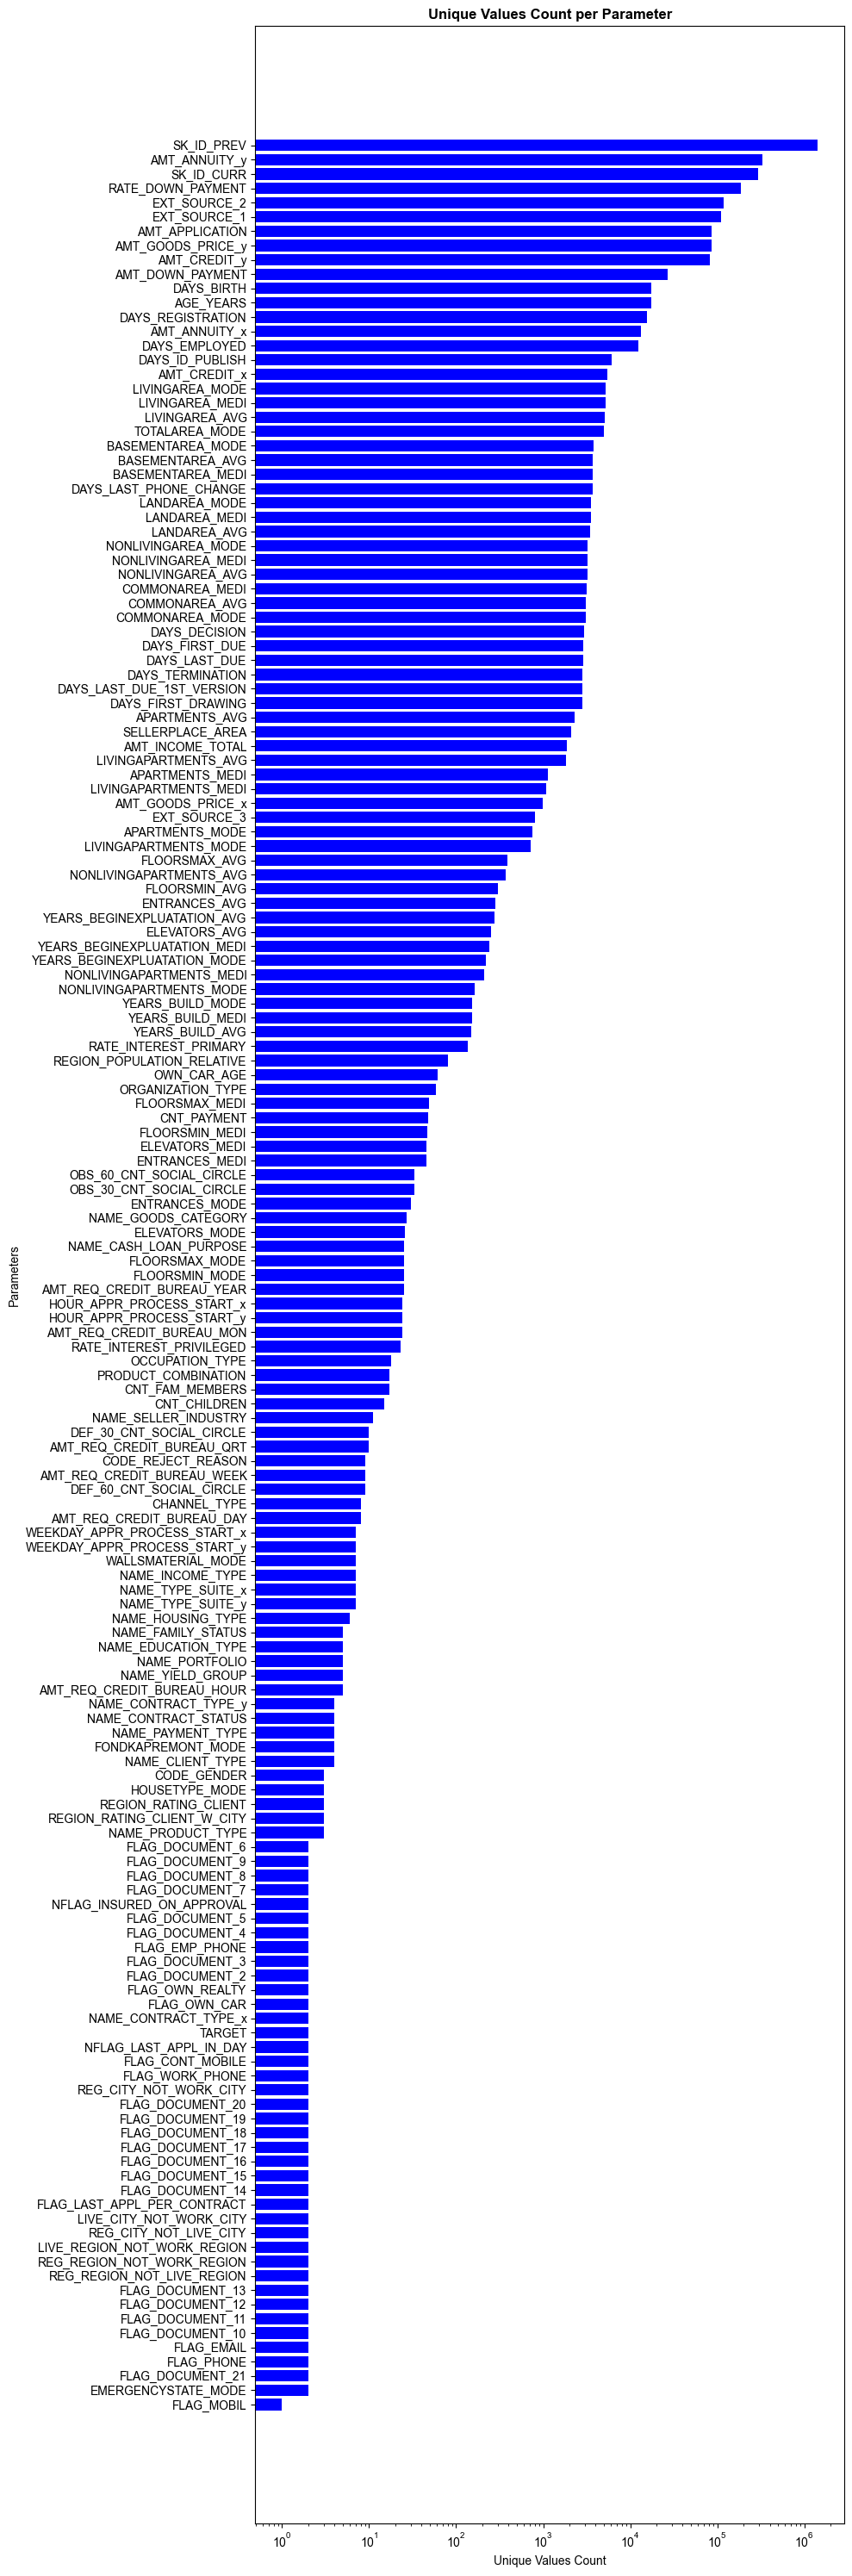

In [33]:
# Load data from a CSV file into a Pandas DataFrame
df = pd.read_csv('data/unique_values_results.csv')
# Sort the DataFrame based on the 'Unique Values Count' column in ascending order
df = df.sort_values(by = 'Unique Values Count', ascending = True)
# Initialize a figure for plotting with a specified size
plt.figure(figsize = (10, 30))
# Plot a horizontal bar chart using 'parameter' for y-axis and 'Unique Values Count' for x-axis
plt.barh(df['parameter'], df['Unique Values Count'], color = 'blue')
# Set the x-axis to a logarithmic scale
plt.xscale('log')
# Label the x-axis as 'Unique Values Count'
plt.xlabel('Unique Values Count')
# Label the y-axis as 'Parameters'
plt.ylabel('Parameters')
# Set the title for the plot and make it bold
plt.title('Unique Values Count per Parameter', fontweight = 'bold')
# Adjust the layout to ensure all labels, titles, and ticks are visible
plt.tight_layout()
# Display the created plot
plt.show()

Categorizing parameters based on cardinality and visualizing their distributions using a pie chart.

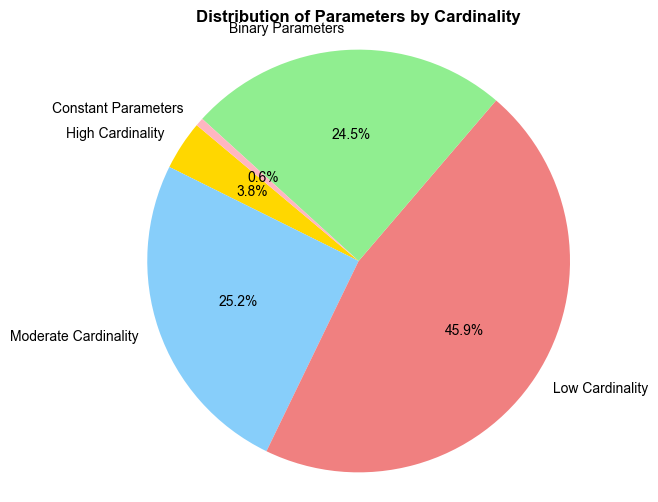

Constant Parameters: ['FLAG_MOBIL']


In [34]:
# Load the dataset from a CSV file into a Pandas DataFrame
df = pd.read_csv('data/unique_values_results.csv')
# Categorize the data based on the 'Unique Values Count' column for high cardinality
high_cardinality = df[df['Unique Values Count'] > 100000]
# Categorize the data for moderate cardinality
moderate_cardinality = df[(df['Unique Values Count'] <= 100000) & (df['Unique Values Count'] > 1000)]
# Categorize the data for low cardinality
low_cardinality = df[(df['Unique Values Count'] <= 1000) & (df['Unique Values Count'] > 2)]
# Categorize the data for binary parameters (2 unique values)
binary_parameters = df[df['Unique Values Count'] == 2]
# Categorize the data for constant parameters (1 unique value)
constant_parameters = df[df['Unique Values Count'] == 1]
# Prepare the data to be used in the pie chart - counts of each cardinality type
sizes = [len(high_cardinality), len(moderate_cardinality), len(low_cardinality), len(binary_parameters), len(constant_parameters)]
# Labels for each segment of the pie chart
labels = ['High Cardinality', 'Moderate Cardinality', 'Low Cardinality', 'Binary Parameters', 'Constant Parameters']
# Colors to be used for each segment of the pie chart
colors = ['gold', 'lightskyblue', 'lightcoral', 'lightgreen', 'lightpink']
# Initialize a figure with a specified size for the pie chart
plt.figure(figsize = (6, 6))
# Plot the pie chart using the prepared sizes, labels, and colors
plt.pie(sizes, labels = labels, colors = colors, autopct = '%1.1f%%', startangle = 140)
# Ensure the pie chart is drawn as a circle (equal aspect ratio)
plt.axis('equal')
# Set the title for the pie chart
plt.title('Distribution of Parameters by Cardinality', fontweight = 'bold')
# Display the pie chart
plt.show()
# Print the parameters that have a constant value
print("Constant Parameters:", constant_parameters['parameter'].tolist())
# Saving the dataframe to an Excel file
df.to_excel("cardinality_analysis_results.xlsx", engine='openpyxl', index=False)

**- Identifying the missed values**

Missing values are identified and ranked according to their severity, which is critical for maintaining data integrity, establishing imputation strategies, and ensuring robust analysis results.

In [35]:
# Count the number of missing values for each column in the DataFrame
missing_values = df.isnull().sum()
# Filter out columns that have missing values and sort them in descending order
significant_missing = missing_values[missing_values > 0].sort_values(ascending=False)
# Display the columns that have missing values and their counts
print("Columns with Missing Values:")
print("---------------------------")
print(significant_missing)
print("\n")

Columns with Missing Values:
---------------------------
Unnamed: 2    159
Unnamed: 3    159
Unnamed: 4    159
Unnamed: 5    159
Unnamed: 6    159
dtype: int64




In [36]:
# Count the number of missing values for each column in the DataFrame
missing_values = df.isnull().sum()
# Filter out columns that have missing values and sort them in descending order
significant_missing = missing_values[missing_values > 0].sort_values(ascending=False)
# Display the columns that have missing values and their counts
print("Columns with Missing Values:")
print("---------------------------")
print(significant_missing)
print("\n")
# Save to Excel file
significant_missing.to_excel("missing_values.xlsx")

Columns with Missing Values:
---------------------------
Unnamed: 2    159
Unnamed: 3    159
Unnamed: 4    159
Unnamed: 5    159
Unnamed: 6    159
dtype: int64




**- Descriptive statistics on numerical values**

The descriptive statistical analysis was done for numerical columns in the DataFrame, aiding in understanding distributions, central tendencies, and data spread.

In [37]:
# --- Basic Statistical Summaries ---
# Print out the general statistics for the numeric columns in the df DataFrame
print("Statistics for Numerical Values:")
print("-------------------------------")
# Display statistical summary for all numerical columns
print(df.describe())
print("\n")

Statistics for Numerical Values:
-------------------------------
       Unique Values Count  Unnamed: 2  Unnamed: 3  Unnamed: 4  Unnamed: 5  \
count         1.590000e+02         0.0         0.0         0.0         0.0   
mean          1.834189e+04         NaN         NaN         NaN         NaN   
std           1.185994e+05         NaN         NaN         NaN         NaN   
min           1.000000e+00         NaN         NaN         NaN         NaN   
25%           2.500000e+00         NaN         NaN         NaN         NaN   
50%           2.500000e+01         NaN         NaN         NaN         NaN   
75%           2.552500e+03         NaN         NaN         NaN         NaN   
max           1.413701e+06         NaN         NaN         NaN         NaN   

       Unnamed: 6  
count         0.0  
mean          NaN  
std           NaN  
min           NaN  
25%           NaN  
50%           NaN  
75%           NaN  
max           NaN  




**c. Univariate Analysis (UA)**

Individual variables were scrutinized, helping in understanding the distribution and tendencies of each feature. Histograms, box plots, and bar charts were primarily used. The diagrams were plotted for both the numerical and categorical variables

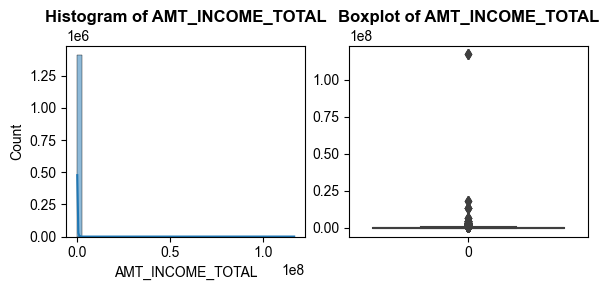

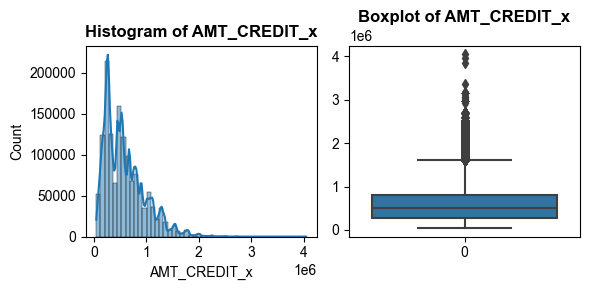

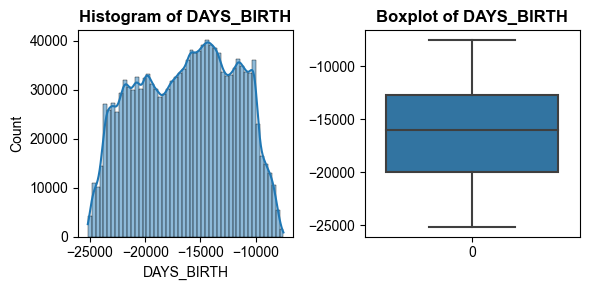

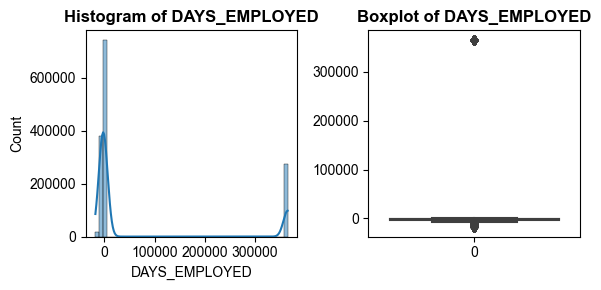

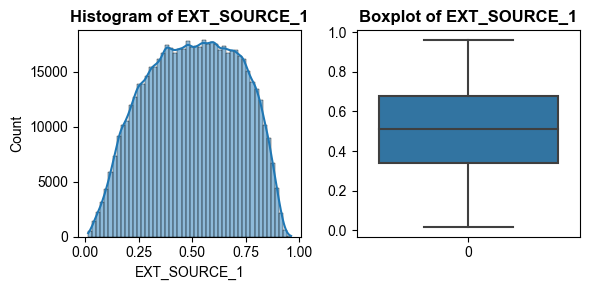

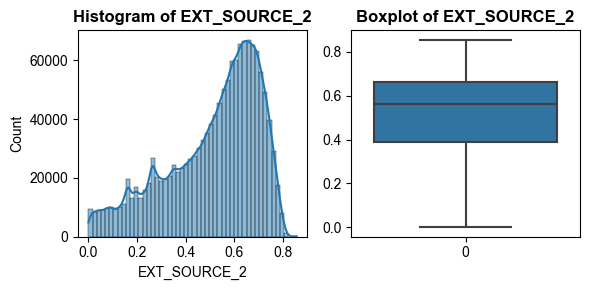

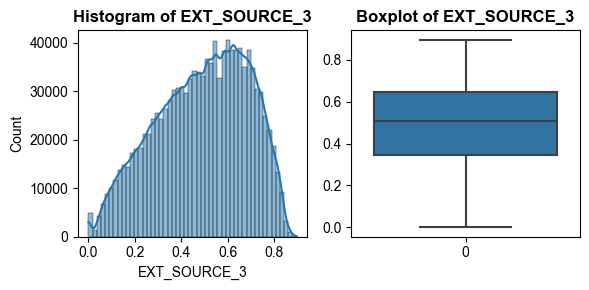

In [61]:
# Define a list of numerical variables based on the provided data for univariate analysis
numerical_vars = ['AMT_INCOME_TOTAL', 'AMT_CREDIT_x', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']
# Define a list of categorical variables based on the provided data for univariate analysis
categorical_vars = ['NAME_CONTRACT_TYPE_x', 'CODE_GENDER', 'FLAG_OWN_CAR', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'OCCUPATION_TYPE']
# For each numerical variable, a histogram was plotted for each variable (paramter) to see its distribution and a boxplot to identify outliers
for column in numerical_vars:
    # Set the size of the figure for the plots
    plt.figure(figsize = (6, 3))
    # Create a subplot for the histogram
    plt.subplot(1, 2, 1)
    # Plot the histogram using seaborn's histplot function with 50 bins and kernel density estimate (kde)
    sns.histplot(df[column], bins = 50, kde = True)
    # Set the title for the histogram
    plt.title(f'Histogram of {column}', fontweight = 'bold')  
    # Create a subplot for the boxplot
    plt.subplot(1, 2, 2)
    # Plot the boxplot using seaborn's boxplot function
    sns.boxplot(df[column])
    # Set the title for the boxplot
    plt.title(f'Boxplot of {column}', fontweight = 'bold')
    # Adjust the layout to ensure the plots don't overlap
    plt.tight_layout()
    # Display the plots
    plt.show()


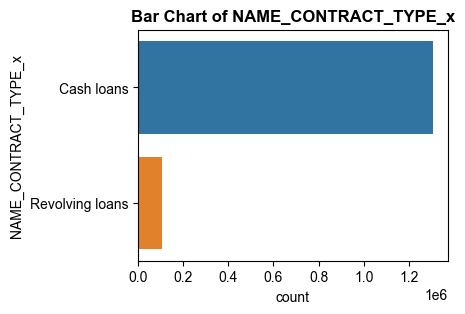

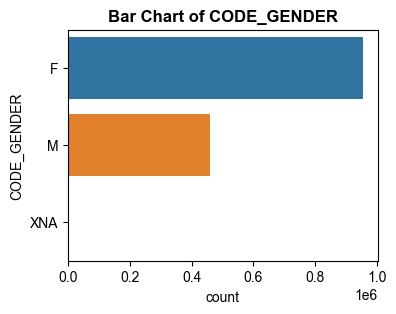

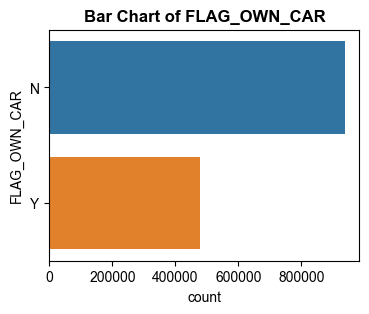

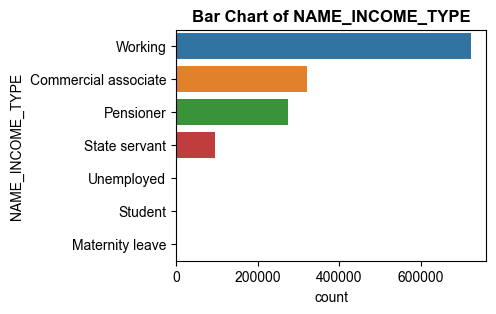

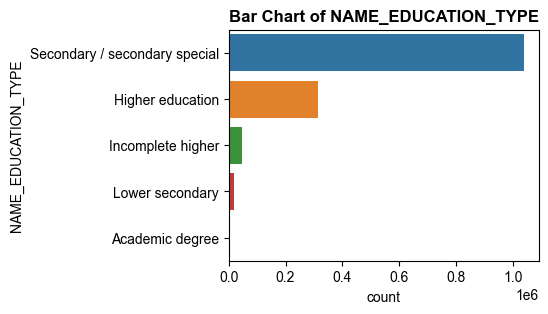

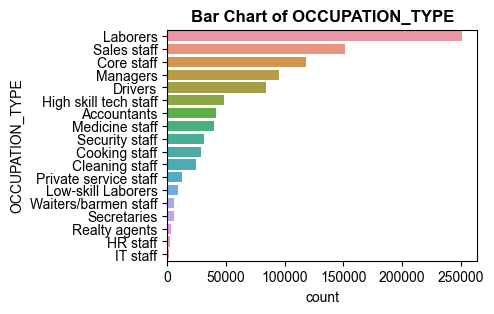

In [62]:
# For each categorical variable, we will plot a bar chart to see the frequency of each category
for column in categorical_vars:
    # Set the size of the figure for the bar chart
    plt.figure(figsize = (4, 3))
    # Plot the bar chart using seaborn's countplot function, arranging bars in descending order of counts
    sns.countplot(data = df, y = column, order = df[column].value_counts().index)
    # Set the title for the bar chart
    plt.title(f'Bar Chart of {column}', fontweight = 'bold')
    # Display the plot
    plt.show()

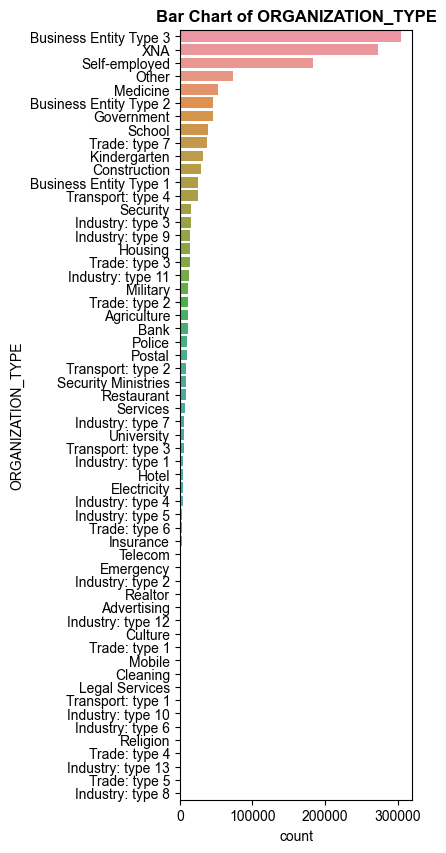

In [64]:
categorical_vars = ['ORGANIZATION_TYPE']
# For each categorical variable, we will plot a bar chart to see the frequency of each category
for column in categorical_vars:
    # Set the size of the figure for the bar chart
    plt.figure(figsize = (3, 10))
    # Plot the bar chart using seaborn's countplot function, arranging bars in descending order of counts
    sns.countplot(data = df, y = column, order = df[column].value_counts().index)
    # Set the title for the bar chart
    plt.title(f'Bar Chart of {column}', fontweight = 'bold')
    # Display the plot
    plt.show()

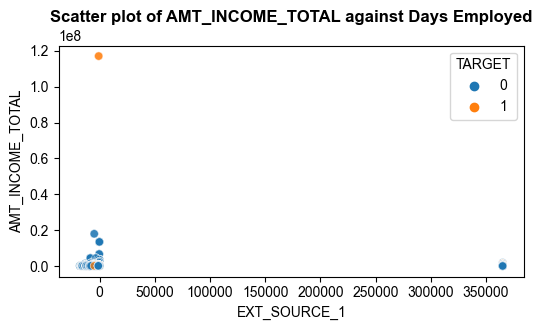

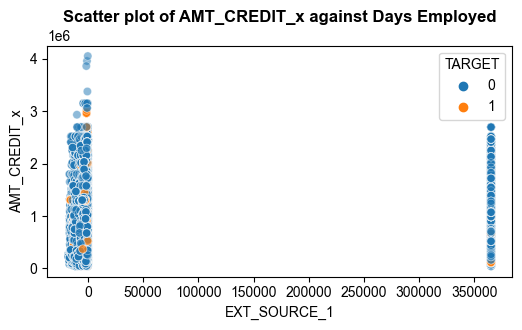

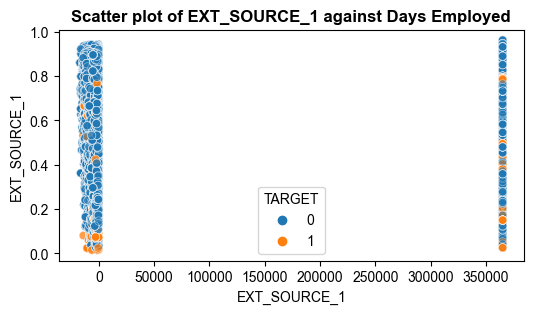

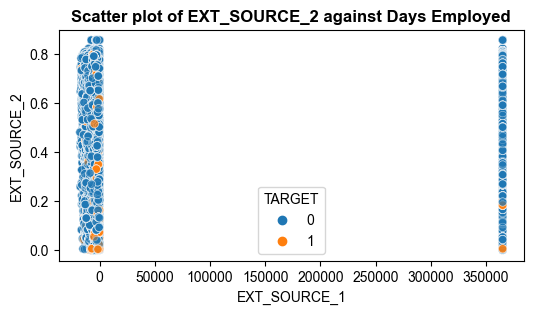

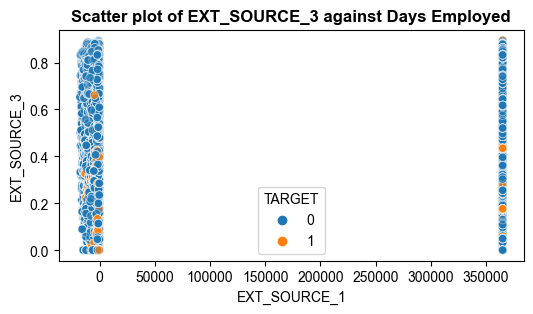

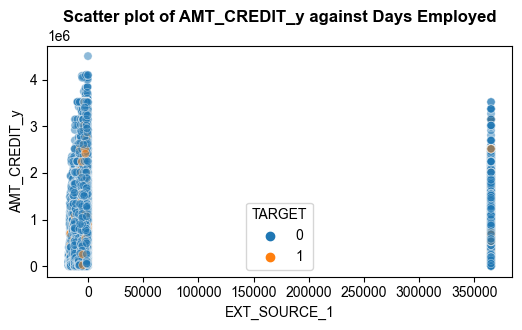

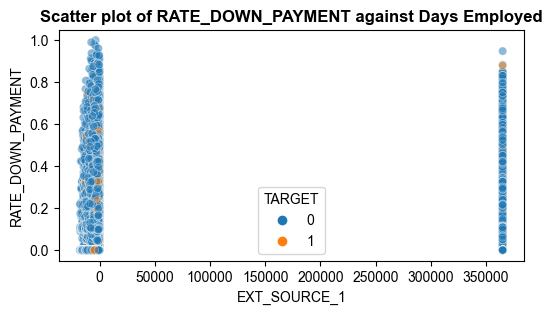

In [78]:
# Defining key numerical columns. New variables are added if they are not in the list
key_numerical_columns = ['AMT_INCOME_TOTAL', 'AMT_CREDIT_x', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'AMT_CREDIT_y', 'DAYS_EMPLOYED', 'RATE_DOWN_PAYMENT']
# Looping through each numerical column to create scatter plots against DAYS_EMPLOYED
for column in key_numerical_columns:
    # Exclude plotting DAYS_EMPLOYED against itself
    if column != 'DAYS_EMPLOYED':
        # Setting the size of the plot
        plt.figure(figsize = (6, 3))    
        # Creating a scatter plot where the hue (color) is determined by the TARGET variable
        sns.scatterplot(data = df, x = 'DAYS_EMPLOYED', y = column, hue = 'TARGET', alpha = 0.5)
        # Setting the title of the plot
        plt.title(f'Scatter plot of {column} against Days Employed', fontweight = 'bold')  
        # Setting the x-axis label
        plt.xlabel('EXT_SOURCE_1')    
        # Setting the y-axis label
        plt.ylabel(column)           
        # Displaying the plot
        plt.show()           

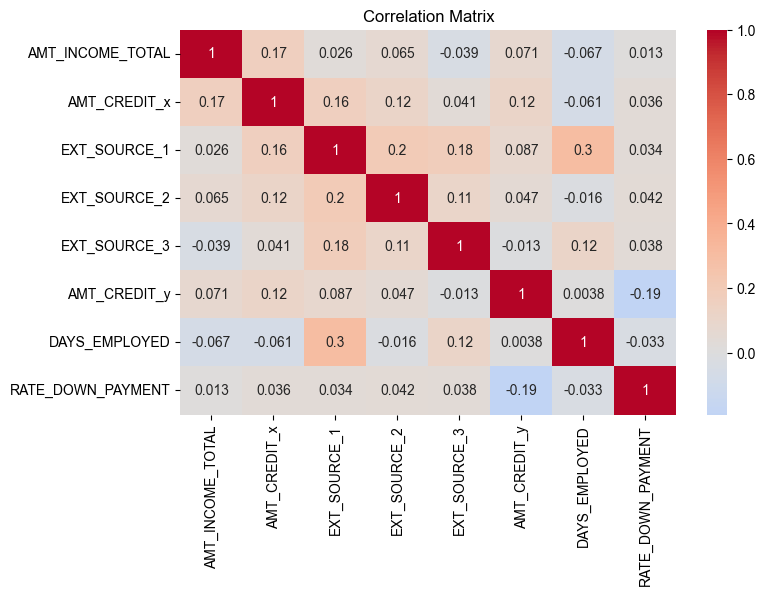

In [77]:
# Creating a correlation matrix for the numerical variables
correlation_matrix = df[key_numerical_columns].corr()
# Setting the size of the plot
plt.figure(figsize=(8,5))       
# Using a heatmap to visualize the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
# Setting the title for the heatmap
plt.title('Correlation Matrix')  
# Displaying the plot
plt.show()                       
# Save the correlation matrix to an Excel file
correlation_matrix.to_excel('coor_output.xlsx')

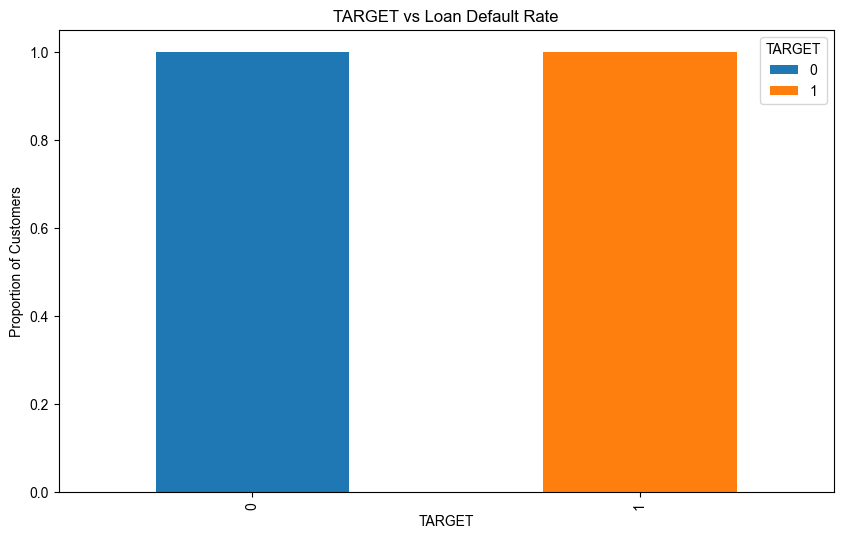

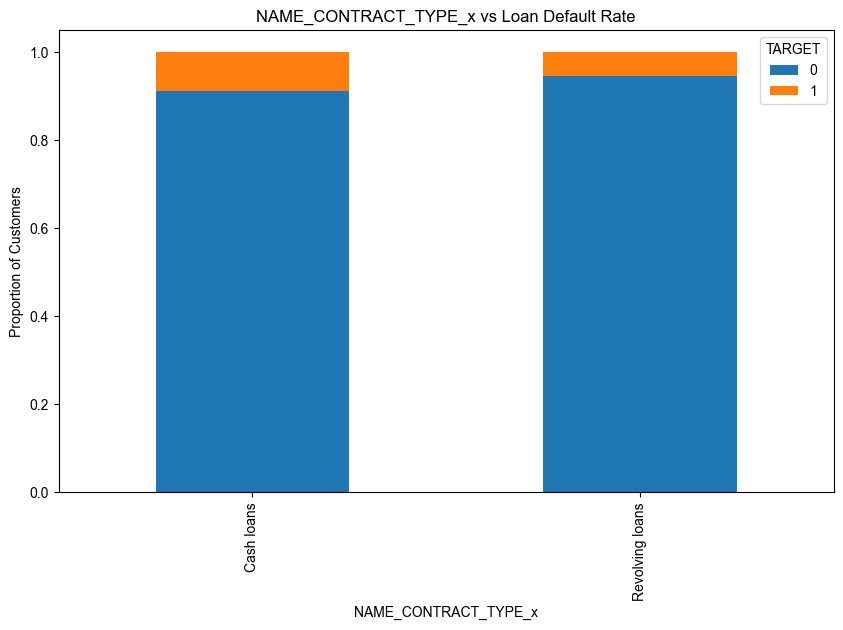

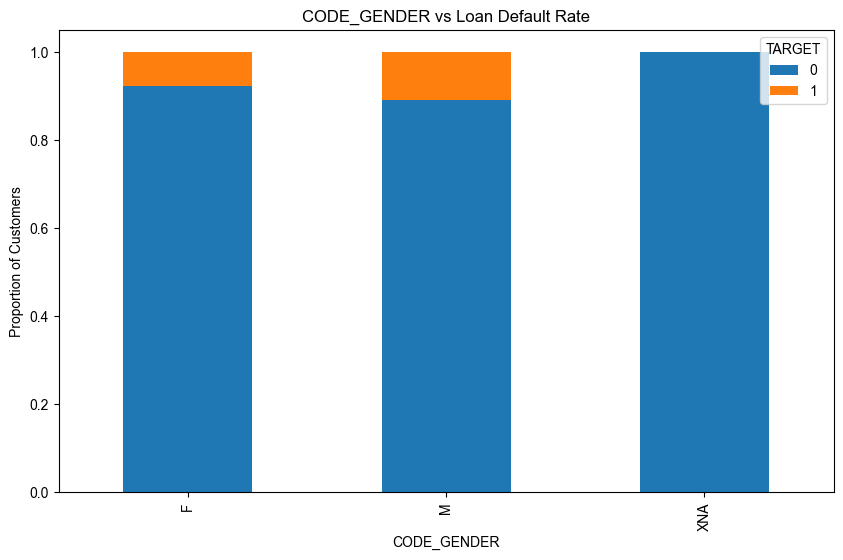

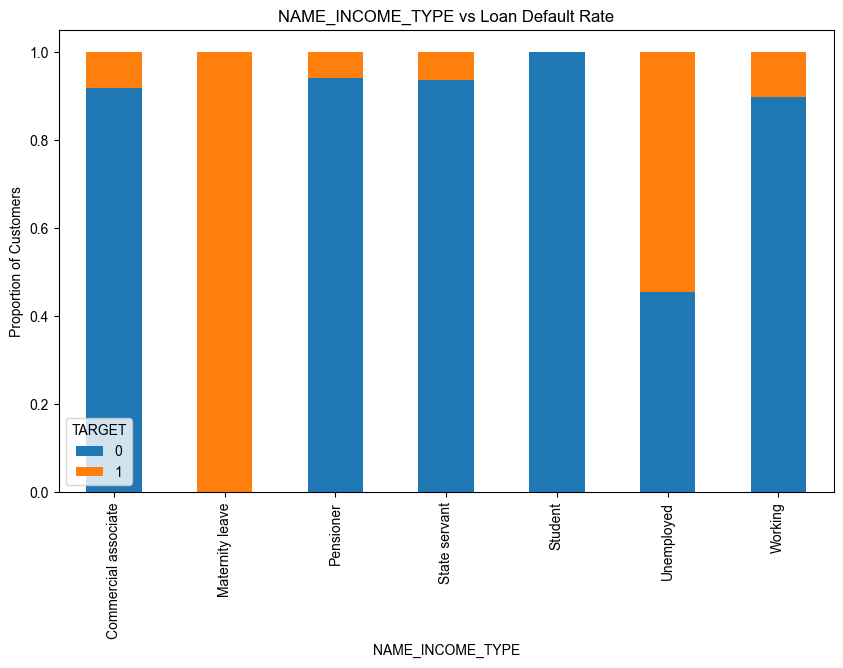

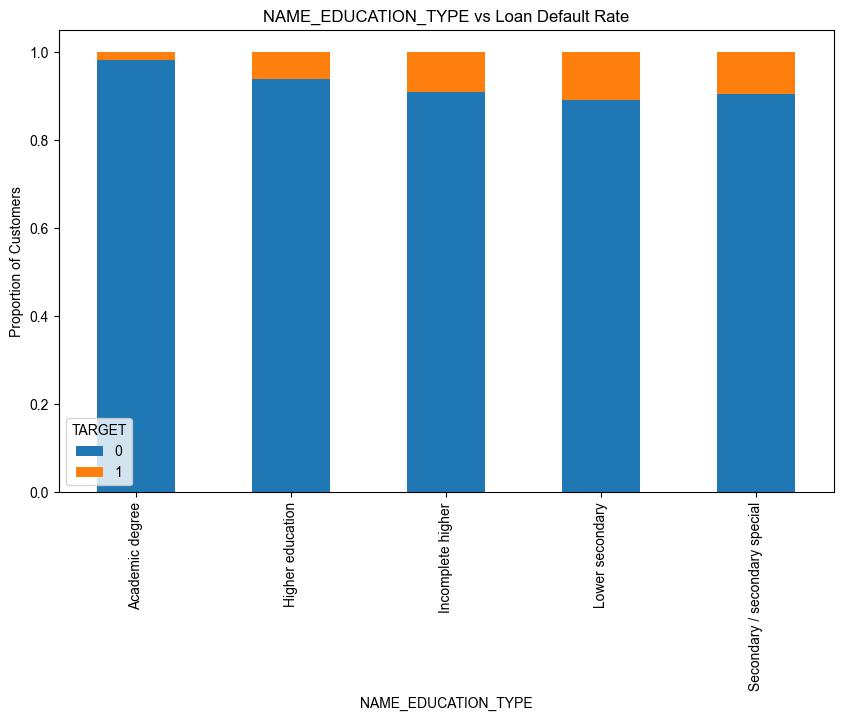

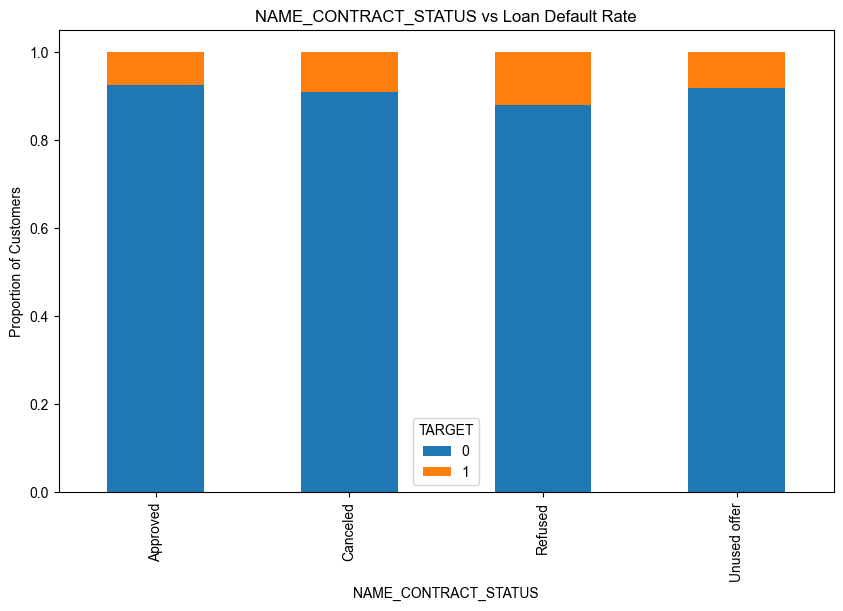

In [68]:
# Defining key categorical columns. Adding NAME_EDUCATION_TYPE and NAME_CONTRACT_STATUS
key_categorical_columns = ['TARGET','NAME_CONTRACT_TYPE_x', 'CODE_GENDER', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_CONTRACT_STATUS']
# Looping through each categorical column to create stacked bar plots against TARGET
for column in key_categorical_columns:
    # Creating a crosstab of the categorical column vs. TARGET, normalized by index
    crosstab = pd.crosstab(df[column], df['TARGET'], normalize='index')
    # Plotting the stacked bar chart from the crosstab
    crosstab.plot(kind = 'bar', stacked = True, figsize = (6, 3))
    # Setting the title of the plot
    plt.title(f'{column} vs Loan Default Rate')  
    # Setting the y-axis label
    plt.ylabel('Proportion of Customers')       
    # Setting the x-axis label
    plt.xlabel(column)                          
    # Displaying the plot
    plt.show()       

False
